In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.config.set_visible_devices([], 'GPU')
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [13]:
# # To find out which devices your operations and tensors are assigned to
# tf.debugging.set_log_device_placement(True)

# # Create some tensors and perform an operation
# a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
# b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# c = tf.matmul(a, b)

# print(c)

In [14]:
url = "datasets/rice/Rice_Dataset.csv"

df = pd.read_csv(url, sep=",")

In [15]:
target = df["CLASS"]
df = df.iloc[:, 0:16]
df["CLASS"] = target

In [16]:
df.shape

(75000, 17)

In [17]:
df.drop_duplicates(inplace=True)
df.shape

(74703, 17)

In [18]:
df.tail()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,CLASS
74995,5551,285.911,114.169,62.908,0.835,84.070,0.985,5638,0.642,1.815,0.853,0.736,0.021,0.011,0.542,0.984,Arborio
74996,7696,322.703,121.390,81.138,0.744,98.989,0.987,7799,0.731,1.496,0.929,0.816,0.016,0.011,0.665,0.995,Karacadag
74997,7579,339.295,136.312,71.287,0.852,98.234,0.981,7730,0.640,1.912,0.827,0.721,0.018,0.009,0.519,0.993,Arborio
74998,15174,489.502,200.949,97.628,0.874,138.997,0.977,15537,0.790,2.058,0.796,0.692,0.013,0.006,0.478,0.985,Ipsala
74999,12931,452.635,185.514,90.265,0.874,128.313,0.976,13249,0.764,2.055,0.793,0.692,0.014,0.007,0.478,0.983,Ipsala


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74703 entries, 0 to 74999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           74703 non-null  int64  
 1   PERIMETER      74703 non-null  float64
 2   MAJOR_AXIS     74703 non-null  float64
 3   MINOR_AXIS     74703 non-null  float64
 4   ECCENTRICITY   74703 non-null  float64
 5   EQDIASQ        74703 non-null  float64
 6   SOLIDITY       74703 non-null  float64
 7   CONVEX_AREA    74703 non-null  int64  
 8   EXTENT         74703 non-null  float64
 9   ASPECT_RATIO   74703 non-null  float64
 10  ROUNDNESS      74703 non-null  float64
 11  COMPACTNESS    74703 non-null  float64
 12  SHAPEFACTOR_1  74703 non-null  float64
 13  SHAPEFACTOR_2  74703 non-null  float64
 14  SHAPEFACTOR_3  74703 non-null  float64
 15  SHAPEFACTOR_4  74703 non-null  float64
 16  CLASS          74703 non-null  object 
dtypes: float64(14), int64(2), object(1)
memory usage: 10.3+

array([[<Axes: title={'center': 'AREA'}>,
        <Axes: title={'center': 'PERIMETER'}>,
        <Axes: title={'center': 'MAJOR_AXIS'}>,
        <Axes: title={'center': 'MINOR_AXIS'}>],
       [<Axes: title={'center': 'ECCENTRICITY'}>,
        <Axes: title={'center': 'EQDIASQ'}>,
        <Axes: title={'center': 'SOLIDITY'}>,
        <Axes: title={'center': 'CONVEX_AREA'}>],
       [<Axes: title={'center': 'EXTENT'}>,
        <Axes: title={'center': 'ASPECT_RATIO'}>,
        <Axes: title={'center': 'ROUNDNESS'}>,
        <Axes: title={'center': 'COMPACTNESS'}>],
       [<Axes: title={'center': 'SHAPEFACTOR_1'}>,
        <Axes: title={'center': 'SHAPEFACTOR_2'}>,
        <Axes: title={'center': 'SHAPEFACTOR_3'}>,
        <Axes: title={'center': 'SHAPEFACTOR_4'}>]], dtype=object)

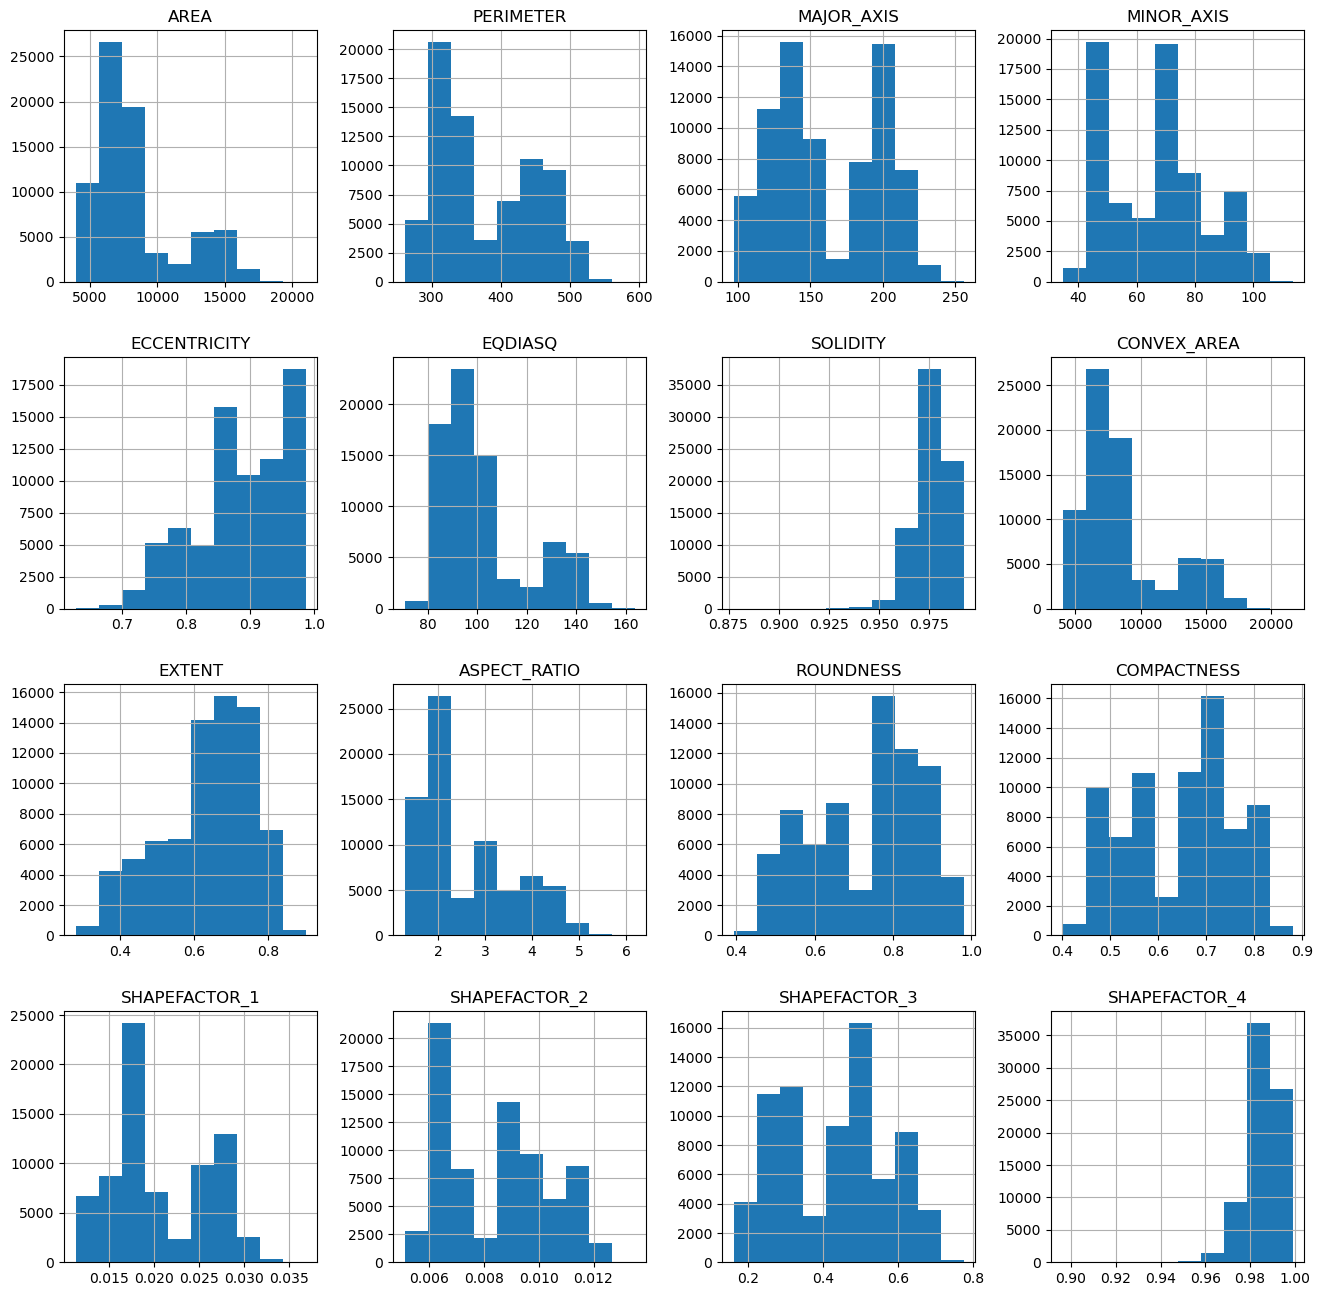

In [20]:
df.hist(figsize=(16, 16))

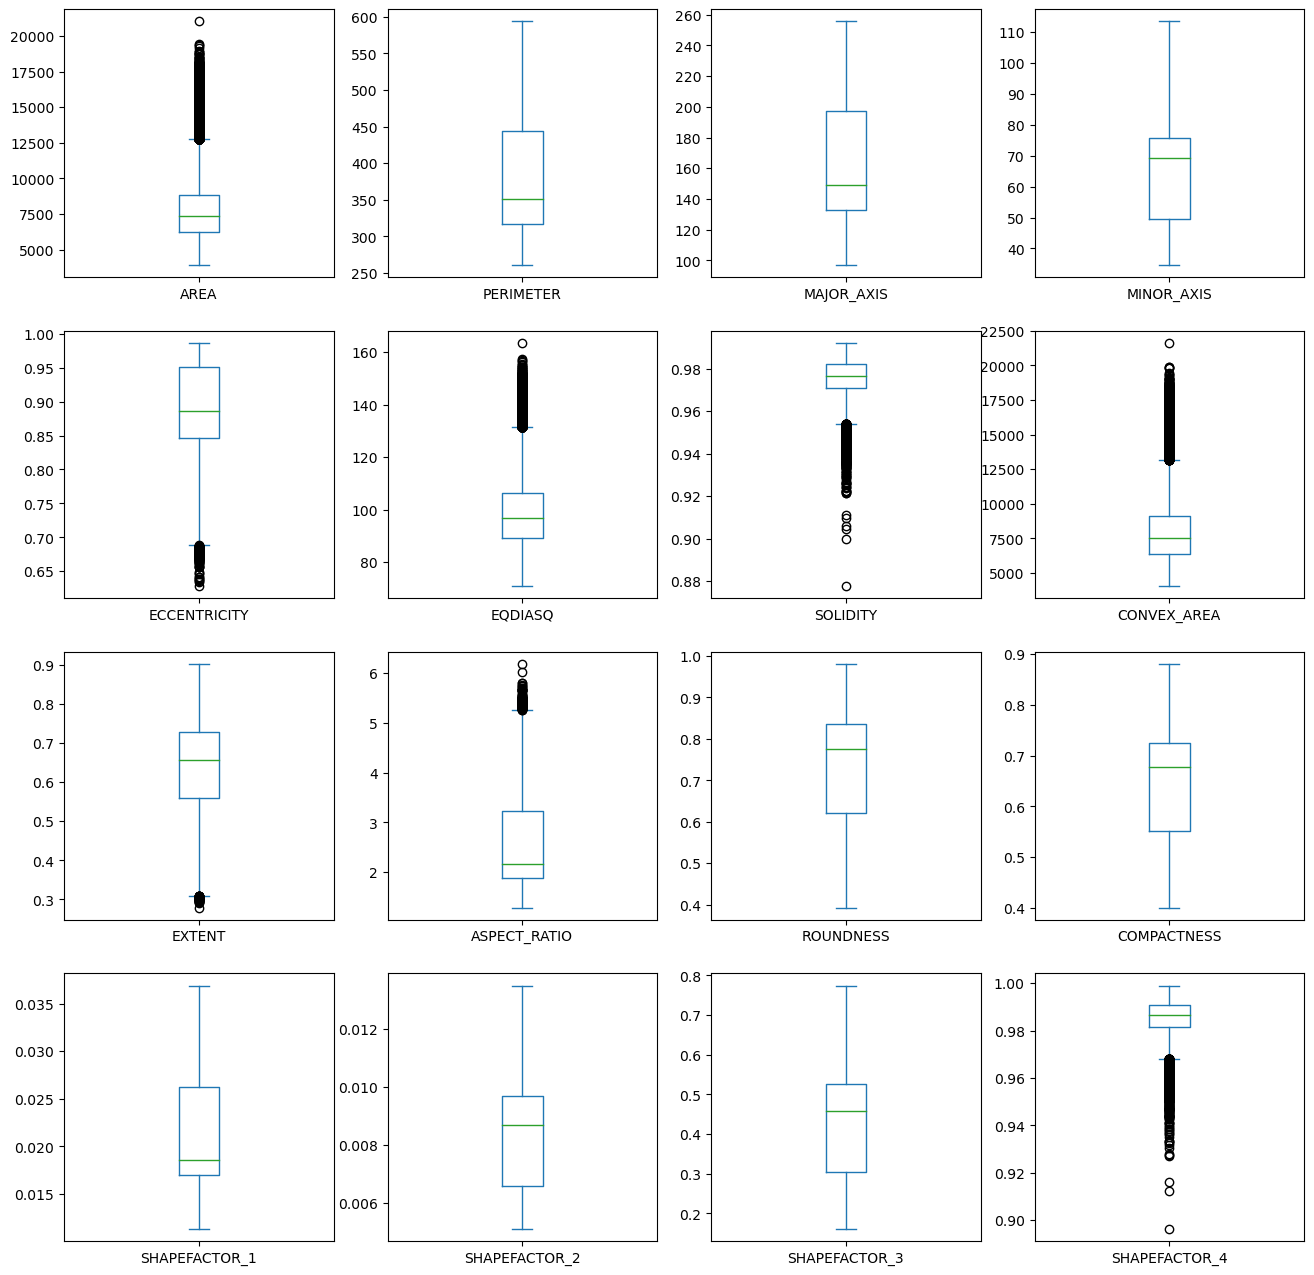

In [21]:
cols = df.select_dtypes(include=["float64", "int64"]).columns
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.flatten()

for i, col in enumerate(cols):
    df[col].plot(kind="box", ax=ax[i])

<Axes: xlabel='CLASS'>

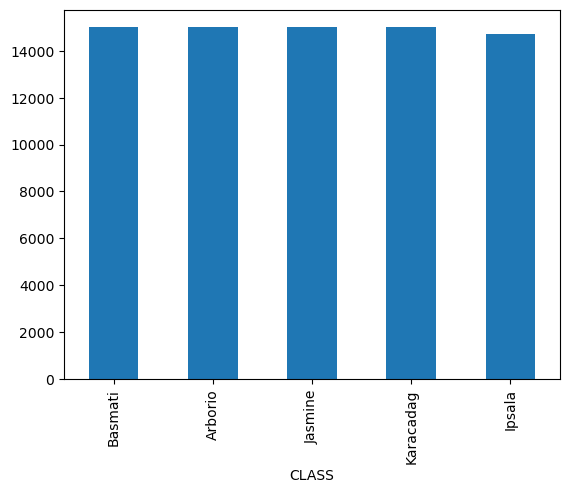

In [22]:
df["CLASS"].value_counts().plot(kind="bar")

In [23]:
oh_enc = OneHotEncoder(drop="if_binary")
num_sc = StandardScaler()
label_enc = LabelEncoder()

num_pipeline = make_pipeline(num_sc)
cat_pipeline = make_pipeline(oh_enc)

tr = ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include=["float64", "int64"]))
])

In [24]:
X = df.iloc[:, 0:-1]
y = df["CLASS"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(59762, 16)
(59762,)
(14941, 16)
(14941,)


In [27]:
X_train = tr.fit_transform(X_train)
X_test = tr.transform(X_test)

y_train = label_enc.fit_transform(y_train)
y_test = label_enc.transform(y_test)

In [28]:
X_train.shape

(59762, 16)

In [29]:
y_train.shape

(59762,)

In [30]:
ann = Sequential()
ann.add(Dense(16, input_shape=(16,), activation="relu"))
ann.add(Dense(50, activation="relu"))
ann.add(Dense(50, activation="relu"))
ann.add(Dense(50, activation="relu"))
ann.add(Dense(50, activation="relu"))
ann.add(Dense(5, activation="softmax"))

2024-03-15 02:35:06.985419: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
ann.compile(loss="sparse_categorical_crossentropy", optimizer=tf.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [32]:
num_epochs = 150

hist = ann.fit(X_train, y_train, epochs=num_epochs, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/150


2024-03-15 02:35:07.825638: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7a504c009920 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-03-15 02:35:07.825686: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2024-03-15 02:35:07.856904: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


 64/117 [===============>..............] - ETA: 0s - loss: 0.2308 - accuracy: 0.9125

2024-03-15 02:35:08.033768: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


117/117 [==============================] - 1s 4ms/step - loss: 0.1605 - accuracy: 0.9406 - val_loss: 0.0739 - val_accuracy: 0.9753
Epoch 2/150
117/117 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9761 - val_loss: 0.0666 - val_accuracy: 0.9754
Epoch 3/150
117/117 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9777 - val_loss: 0.0672 - val_accuracy: 0.9758
Epoch 4/150
117/117 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9773 - val_loss: 0.0666 - val_accuracy: 0.9780
Epoch 5/150
117/117 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9783 - val_loss: 0.0748 - val_accuracy: 0.9738
Epoch 6/150
117/117 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9787 - val_loss: 0.0662 - val_accuracy: 0.9770
Epoch 7/150
117/117 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9785 - val_loss: 0.0676 - val_accuracy: 0.9754
Epoch 8/150

In [33]:
_, accuracy = ann.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

467/467 [==============================] - 0s 493us/step - loss: 0.0718 - accuracy: 0.9781
Accuracy: 97.81


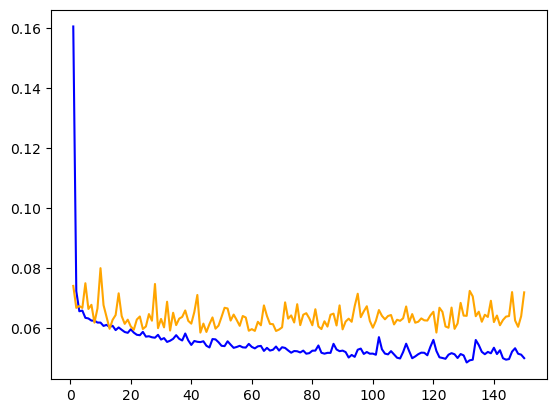

In [34]:
training_losses = hist.history["loss"]
test_losses = hist.history["val_loss"]
epochs = np.arange(1, num_epochs + 1)

plt.plot(epochs, training_losses, color="blue")
plt.plot(epochs, test_losses, color="orange")